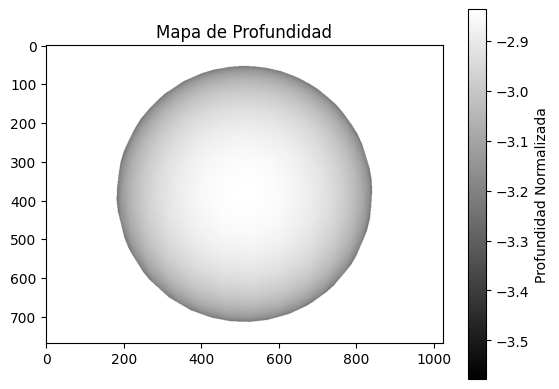

In [21]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

# Crear una malla de ejemplo (en este caso, una esfera)
mesh = pv.Sphere()

# Crear un plotter con renderizado fuera de pantalla
plotter = pv.Plotter(off_screen=True)

# Añadir la malla al plotter
plotter.add_mesh(mesh)

# Configurar la cámara
plotter.view_isometric()
plotter.camera.zoom(1.5)  # Ajustar el zoom si es necesario

# Renderizar la escena
plotter.render()

# Capturar y guardar la imagen de la escena
img_path = "./data/images/escena.png"
plotter.screenshot(img_path)

# Obtener el mapa de profundidad
z_buff = plotter.get_image_depth()
# print("Valores del buffer de profundidad (ejemplo):", z_buff.ravel()[::1000])  # Imprime cada 1000 valores

# Reemplazar NaN por un valor alto y valores negativos por 0
max_depth = z_buff[~np.isnan(z_buff)].max()
z_buff = np.nan_to_num(z_buff, nan=max_depth, neginf=0.0, posinf=max_depth)

# Normalizar el buffer de profundidad para visualización
z_buff_normalized = (z_buff - z_buff.min()) / (z_buff.max() - z_buff.min())

# Convertir a un array de NumPy
depth_map = z_buff_normalized

# Visualizar el mapa de profundidad
plt.imshow(z_buff, cmap='gray')
plt.title("Mapa de Profundidad")
plt.colorbar(label='Profundidad Normalizada')
plt.show()

# Opcional: Guardar el mapa de profundidad como imagen
depth_map_path = "./data/images/mapa_de_profundidad.png"
plt.imsave(depth_map_path, z_buff, cmap='gray')